In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # To restrict the output between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [21]:

# Define the hyperparameters
input_dim = 784  # Size of MNIST images
encoding_dim = 32  # Dimension of the encoded representation
learning_rate = 0.001
num_epochs = 10
batch_size = 128

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

# Initialize the autoencoder
autoencoder = Autoencoder(input_dim, encoding_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)


In [22]:
from tqdm import tqdm

In [23]:

# Training the autoencoder
for epoch in tqdm(range(num_epochs)):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the images
        optimizer.zero_grad()
        reconstructed = autoencoder(img)
        loss = criterion(reconstructed, img)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Testing the autoencoder by reconstructing images from the latent space and computing MSE
total_mse = 0
total_samples = 0
for data in train_loader:
    img, _ = data
    img = img.view(img.size(0), -1)  # Flatten the images
    reconstructed = autoencoder(img)
    mse = criterion(reconstructed, img)
    total_mse += mse.item() * img.size(0)
    total_samples += img.size(0)

average_mse = total_mse / total_samples
print('Average MSE on training data: {:.4f}'.format(average_mse))


 10%|█         | 1/10 [00:04<00:36,  4.10s/it]

Epoch [1/10], Loss: 0.9233


 20%|██        | 2/10 [00:07<00:31,  3.93s/it]

Epoch [2/10], Loss: 0.9242


 30%|███       | 3/10 [00:11<00:27,  3.89s/it]

Epoch [3/10], Loss: 0.9237


 40%|████      | 4/10 [00:15<00:23,  3.87s/it]

Epoch [4/10], Loss: 0.9227


 50%|█████     | 5/10 [00:19<00:19,  3.83s/it]

Epoch [5/10], Loss: 0.9283


 60%|██████    | 6/10 [00:23<00:15,  3.84s/it]

Epoch [6/10], Loss: 0.9263


 70%|███████   | 7/10 [00:27<00:11,  3.90s/it]

Epoch [7/10], Loss: 0.9278


 80%|████████  | 8/10 [00:31<00:07,  3.97s/it]

Epoch [8/10], Loss: 0.9275


 90%|█████████ | 9/10 [00:35<00:03,  3.91s/it]

Epoch [9/10], Loss: 0.9273


100%|██████████| 10/10 [00:39<00:00,  3.93s/it]

Epoch [10/10], Loss: 0.9253


Average MSE on training data: 0.9254


In [24]:
for data in train_loader:
    img, _ = data
    img = img.view(img.size(0), -1)  # Flatten the images
    reconstructed = autoencoder(img)
    mse = criterion(reconstructed, img)
    total_mse += mse.item() * img.size(0)
    total_samples += img.size(0)

average_mse = total_mse / total_samples
print('Average MSE on training data: {:.4f}'.format(average_mse))

Average MSE on training data: 0.9254


In [25]:
reconstructed.shape


torch.Size([96, 784])

In [26]:

reshaped_tensor = reconstructed.view(96, 28, 28)

In [31]:
img.shape
img_new = img.view(96, 28, 28)

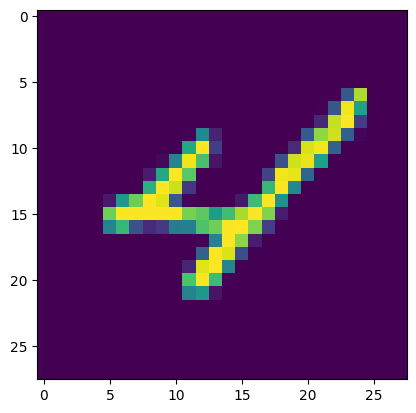

In [32]:
plt.imshow(img_new.detach().numpy()[0])

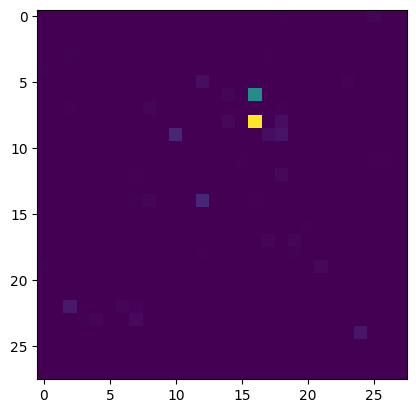

In [33]:
plt.imshow(reshaped_tensor.detach().numpy()[0])

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28x1 -> 14x14x16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14x16 -> 7x7x32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # 7x7x32 -> 4x4x64
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # 4x4x64 -> 7x7x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7x32 -> 14x14x16
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14x16 -> 28x28x1
            nn.Sigmoid()  # To restrict the output between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define the hyperparameters
learning_rate = 1e-4
num_epochs = 50
batch_size = 128

# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

# Initialize the autoencoder
autoencoder = Autoencoder()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)


In [41]:

# Training the autoencoder
for epoch in tqdm(range(num_epochs)):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        reconstructed = autoencoder(img)
        loss = criterion(reconstructed, img)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



  2%|▏         | 1/50 [00:26<21:46, 26.66s/it]

Epoch [1/50], Loss: 0.8762


  4%|▍         | 2/50 [00:55<22:29, 28.11s/it]

Epoch [2/50], Loss: 0.8764


  6%|▌         | 3/50 [01:25<22:34, 28.82s/it]

Epoch [3/50], Loss: 0.8833


  8%|▊         | 4/50 [01:53<22:00, 28.70s/it]

Epoch [4/50], Loss: 0.8809


 10%|█         | 5/50 [02:22<21:23, 28.52s/it]

Epoch [5/50], Loss: 0.8833


 12%|█▏        | 6/50 [02:52<21:15, 28.99s/it]

Epoch [6/50], Loss: 0.8828


 14%|█▍        | 7/50 [03:19<20:30, 28.62s/it]

Epoch [7/50], Loss: 0.8797


 16%|█▌        | 8/50 [03:53<21:05, 30.12s/it]

Epoch [8/50], Loss: 0.8827


 18%|█▊        | 9/50 [04:22<20:24, 29.86s/it]

Epoch [9/50], Loss: 0.8850


 20%|██        | 10/50 [04:52<19:53, 29.84s/it]

Epoch [10/50], Loss: 0.8766


 22%|██▏       | 11/50 [05:22<19:30, 30.00s/it]

Epoch [11/50], Loss: 0.8861


 22%|██▏       | 11/50 [05:34<19:46, 30.43s/it]


KeyboardInterrupt: 

In [ ]:
# Testing the autoencoder by reconstructing images from the latent space and computing MSE
total_mse = 0
total_samples = 0
for data in train_loader:
    img, _ = data
    reconstructed = autoencoder(img)
    mse = criterion(reconstructed, img)
    total_mse += mse.item() * img.size(0)
    total_samples += img.size(0)

average_mse = total_mse / total_samples
print('Average MSE on training data: {:.4f}'.format(average_mse))


## Old

In [3]:

# Define the hyperparameters
learning_rate = 0.001
num_epochs = 10
batch_size = 128

# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transform),
    batch_size=batch_size, shuffle=False)


In [4]:

# Initialize the autoencoder
model = Autoencoder()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [6]:
outputs

tensor([[[[0.5529, 0.5603, 0.5532,  ..., 0.5603, 0.5525, 0.5546],
          [0.5466, 0.5467, 0.5442,  ..., 0.5476, 0.5454, 0.5498],
          [0.5524, 0.5579, 0.5517,  ..., 0.5591, 0.5525, 0.5552],
          ...,
          [0.5467, 0.5472, 0.5460,  ..., 0.5481, 0.5463, 0.5502],
          [0.5523, 0.5593, 0.5519,  ..., 0.5596, 0.5523, 0.5547],
          [0.5542, 0.5592, 0.5536,  ..., 0.5590, 0.5534, 0.5600]]],


        [[[0.5529, 0.5604, 0.5532,  ..., 0.5603, 0.5525, 0.5546],
          [0.5466, 0.5467, 0.5442,  ..., 0.5475, 0.5454, 0.5498],
          [0.5524, 0.5580, 0.5517,  ..., 0.5591, 0.5525, 0.5553],
          ...,
          [0.5467, 0.5472, 0.5459,  ..., 0.5481, 0.5463, 0.5501],
          [0.5523, 0.5593, 0.5519,  ..., 0.5595, 0.5522, 0.5547],
          [0.5541, 0.5593, 0.5536,  ..., 0.5590, 0.5534, 0.5599]]],


        [[[0.5529, 0.5604, 0.5532,  ..., 0.5603, 0.5525, 0.5546],
          [0.5466, 0.5467, 0.5443,  ..., 0.5477, 0.5456, 0.5501],
          [0.5524, 0.5579, 0.5517,  ..

In [5]:

# Training the autoencoder
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        outputs = model(img)
        loss = criterion(outputs, img)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



RuntimeError: all elements of target should be between 0 and 1

In [ ]:
# Testing the autoencoder
test_images, _ = next(iter(test_loader))
with torch.no_grad():
    reconstructed = model(test_images)

# Visualize the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
